# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
try:
    data = pd.read_csv('/datasets/data.csv')
except FileNotFoundError:
    data = pd.read_csv('https://raw.githubusercontent.com/Zarayskaya/pre-processing-first-project/main/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [41]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [43]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [44]:
for in_type in data['income_type'].unique():
    data.loc[(data['income_type']==in_type)&(data['total_income'].isna()),'total_income'] = \
    data.loc[(data['income_type']==in_type),'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [45]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [46]:
print(data.groupby('income_type')['days_employed'].median())

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [47]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [48]:
data = data.loc[(data['children'] != 20) & (data['children'] != (-1))]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [49]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [50]:
for in_type in data['income_type'].unique():
    data.loc[(data['income_type']==in_type) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[data['income_type']==in_type, 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [51]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [52]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [53]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [54]:
data.duplicated().sum()

71

In [55]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [56]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [57]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [58]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [59]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [60]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Для определения зависимости между количеством детей и сроком возврата кредита, предлагается определить, какой коэффициент просрочек в каждой категории. Категориями будут выступать количественные значения детей у заемщика.

Таким образом имеем 6 категорий:

In [61]:
data['children'].unique() #выводим уникальные значения количества детей у заемщиков

array([1, 0, 3, 2, 4, 5])

Необходимо определить количество заемщиков по каждой категории, а далее вычислить, какой процент от общего числа заемщиков категории имеет просрочки

Посмотрим на общее количество заемщиков:

In [62]:
children_count = data['children'].value_counts() 
print(children_count)

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64


Проверим столбец debt, содержащий данные о наличии или отсуствии просрочек у заемщика, на наличие ошибок. Выведем уникальные значения, встречающиеся в столбце

In [63]:
data['debt'].unique()

array([0, 1])

Показатель задолженности - целочисленное значение, равное либо нулю (если просрочек не было), либо единице, если просрочки были. Сгруппируем таблицу по количеству детей и просуммируем значения в столбце debt. Таким образом получим количество заемщиков-должников по каждой категории:

In [64]:
debt_children_count = data.groupby('children')['debt'].sum() #группируем таблицу по количеству детей и суммируем значения в столбце просрочки
print(debt_children_count)

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64


Посчитаем коэффициент: разделим количество должников на общее количество заемщиков в категории:

In [65]:
debt_children_coefficient = debt_children_count / children_count #количество просрочек разделим на общее количество заемщиков
print(debt_children_coefficient)

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
dtype: float64


Теперь для определения рискованных категорий заемщиков, необходимо *выделить метрику, с которой будем сравнивать*. На текущий момент непонятно - является ли 9,2% или 8,1% просрочек в категории критическим значением.

Для этого посчитаем общий процент просрочек по всем заемщикам:

In [66]:
all_debt_coefficient = data['debt'].sum()/data['debt'].count()
print(all_debt_coefficient)

0.08119638085415593


Теперь все коэффициенты просрочек по категориям будем сравнивать с общим коэффициентом.

**Но для упрощения расчетов и более понятной презентации результатов, сделаем сводную таблицу:**

In [67]:
data_children_pivot = data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count','sum','mean'], margins=True) #создаем таблицу
#причесываем для наглядности - меняем названия столбцов и удаляем название столбца, по которому происходит группировка
data_children_pivot = data_children_pivot.rename(columns= \
                    {'count':'количество заемщиков', 'debt': '', 'sum':'количество просрочек', 'mean':'коэффициент просрочек'})
data_children_pivot.index.name = None
display(data_children_pivot)

,количество заемщиков,количество просрочек,коэффициент просрочек
,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000
All,21331,1732,0.081196


Значения в таблице сошлись с предыдущими расчетами. Для удобства трактовки столбец с коэффициентом просрочек приведем к процентному значению.

In [68]:
#столбец с коэффициентом просрочек умножаем на 100, переводя в проценты
data_children_pivot['коэффициент просрочек'] = data_children_pivot['коэффициент просрочек']*100
data_children_pivot = data_children_pivot.rename(columns={'коэффициент просрочек':'процент просрочек'}) #переименовываем столбец в проценты
#сортируем данные по проценту должников
data_children_pivot = pd.concat(
    [data_children_pivot[data_children_pivot.index !='All'].sort_values(by='процент просрочек', ascending=False), \
     data_children_pivot[data_children_pivot.index =='All']]
)
display(data_children_pivot)

,количество заемщиков,количество просрочек,процент просрочек
,,,
4,41,4,9.756098
2,2052,194,9.454191
1,4808,444,9.234609
3,330,27,8.181818
0,14091,1063,7.543822
5,9,0,0.000000
All,21331,1732,8.119638


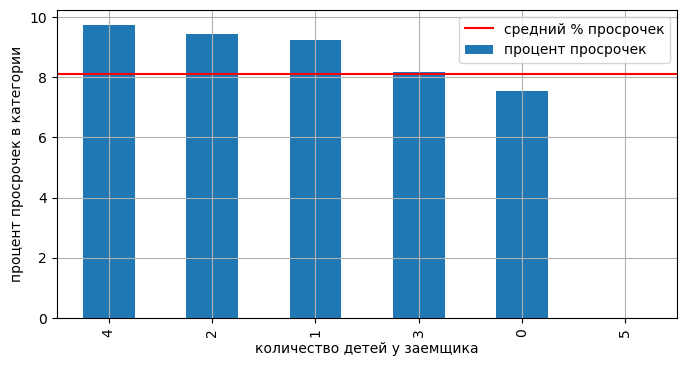

In [94]:
data_children_pivot[data_children_pivot.index != "All"].plot(y='процент просрочек', kind='bar', grid=True, figsize=(8,4))
plt.axhline(data_children_pivot[data_children_pivot.index == "All"]['процент просрочек'][0], color='r', label='средний % просрочек')
plt.xlabel('количество детей у заемщика')
plt.ylabel('процент просрочек в категории')
plt.legend()
plt.show()

Получаем отсортированную таблицу, где понятно, что наибольший процент просрочек у клиентов с 1-4 детьми. Их процент просрочек по кредитам выше общего. Однако из рассматриваемых категорий можно исключить клиентов с пятью детьми (из-за незначительного количества), и тогда сделать вывод, что хуже возвращают кредит клиенты, у которых есть дети.

**Вывод:** 
**Полученные результаты говорят о том, что клиенты, имеющие детей, допускают больше просрочек. Клиенты без детей реже допускают просрочки**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Дальнейшие расчеты носят схожий характер, поэтому будем сразу создавать сводную таблицу:

In [69]:
data_family_pivot = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count','sum','mean'], margins=True) #создаем таблицу
#причесываем для наглядности - меняем названия столбцов и удаляем название стобца, по которому происходит группировка, сразу же называем столбец mean как процент просрочек
data_family_pivot = data_family_pivot.rename(columns= \
                                                 {'count':'количество заемщиков', 'debt': '', 'sum':'количество просрочек', 'mean':'процент просрочек'})
data_family_pivot.index.name = None
display(data_family_pivot)

,количество заемщиков,количество просрочек,процент просрочек
,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
All,21331,1732,0.081196


In [70]:
data_family_pivot['процент просрочек'] = data_family_pivot['процент просрочек']*100
#сортируем данные по проценту должников
data_family_pivot = pd.concat(
    [data_family_pivot[data_family_pivot.index !='All'].sort_values(by='процент просрочек', ascending=False), \
     data_family_pivot[data_family_pivot.index =='All']]
)
display(data_family_pivot)

,количество заемщиков,количество просрочек,процент просрочек
,,,
Не женат / не замужем,2796,273,9.763948
гражданский брак,4134,385,9.313014
женат / замужем,12261,927,7.560558
в разводе,1189,84,7.064760
вдовец / вдова,951,63,6.624606
All,21331,1732,8.119638


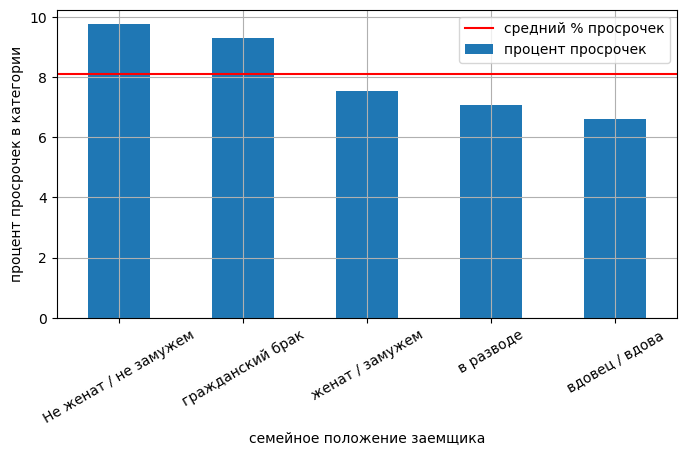

In [96]:
data_family_pivot[data_family_pivot.index != "All"].plot(y='процент просрочек', kind='bar', grid=True, figsize=(8,4))
plt.axhline(data_family_pivot[data_family_pivot.index == "All"]['процент просрочек'][0], color='r', label='средний % просрочек')
plt.xlabel('семейное положение заемщика')
plt.xticks(rotation=30)
plt.ylabel('процент просрочек в категории')
plt.legend()
plt.show()

**Вывод: заемщики, не состоящие в браке, либо не зарегистрировавшие отношения, допускают большее количество просрочек** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [71]:
data_income_pivot = data.pivot_table(index = 'total_income_category', values = 'debt', \
                                     aggfunc = ['count','sum','mean'], margins=True)
data_income_pivot = data_income_pivot.rename(columns= \
                      {'count':'количество заемщиков', 'debt': '', 'sum':'количество просрочек', 'mean':'процент просрочек'})
data_income_pivot.index.name = None
data_income_pivot['процент просрочек'] = data_income_pivot['процент просрочек']*100
data_income_pivot = pd.concat(
    [data_income_pivot[data_income_pivot.index != "All"].sort_values(by='процент просрочек', ascending=False), \
     data_income_pivot[data_income_pivot.index == "All"]]
)
display(data_income_pivot)

,количество заемщиков,количество просрочек,процент просрочек
,,,
E,22,2,9.090909
C,15921,1353,8.498210
A,25,2,8.000000
B,5014,354,7.060231
D,349,21,6.017192
All,21331,1732,8.119638


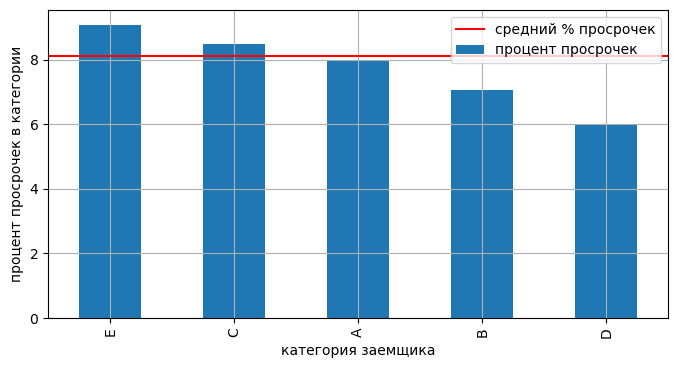

In [101]:
data_income_pivot[data_income_pivot.index != "All"].plot(y='процент просрочек', kind='bar', grid=True, figsize=(8,4))
plt.axhline(data_income_pivot[data_income_pivot.index == "All"]['процент просрочек'][0], color='r', label='средний % просрочек')
plt.xlabel('категория заемщика')
plt.ylabel('процент просрочек в категории')
plt.legend()
plt.show()

Видим, что процент просрочек больше общего у категории Е и С. Это клиенты с уровнем дохода до 30 тыс и от 50 до 200 тыс.

**Вывод: более тщательную проверку необходим производить при одобрении клиентов с уровнем дохода до 30 000 (кат D) и от 50 до 200 тысяч (кат С)** 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [103]:
data_purpose_pivot = data.pivot_table(index = 'purpose_category', values = 'debt', \
                                      aggfunc = ['count','sum','mean'], margins=True)
data_purpose_pivot = data_purpose_pivot.rename(columns= \
                                               {'count':'количество заемщиков', 'debt': '', 'sum':'количество просрочек', 'mean':'процент просрочек'})
data_purpose_pivot.index.name = None
data_purpose_pivot['процент просрочек'] = data_purpose_pivot['процент просрочек']*100
data_purpose_pivot = pd.concat(
    [data_purpose_pivot[data_purpose_pivot.index != "All"].sort_values(by='процент просрочек', ascending=False), \
     data_purpose_pivot[data_purpose_pivot.index == "All"]]
)
display(data_purpose_pivot)

,количество заемщиков,количество просрочек,процент просрочек
,,,
операции с автомобилем,4279,400,9.347978
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803
операции с недвижимостью,10751,780,7.255139
All,21331,1732,8.119638


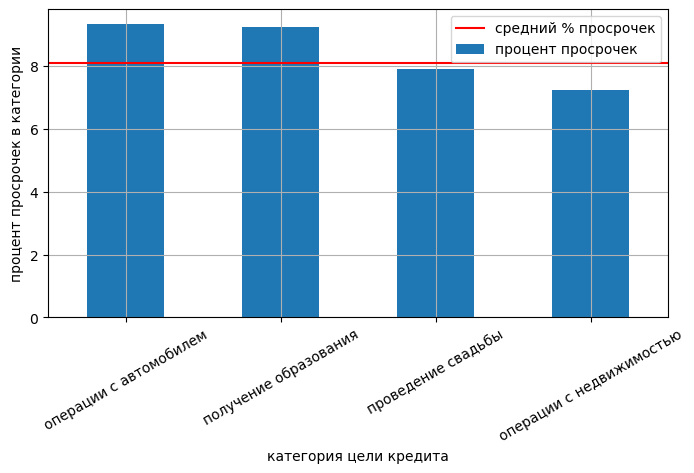

In [105]:
data_purpose_pivot[data_purpose_pivot.index != "All"].plot(y='процент просрочек', kind='bar', grid=True, figsize=(8,4))
plt.axhline(data_purpose_pivot[data_purpose_pivot.index == "All"]['процент просрочек'][0], color='r', label='средний % просрочек')
plt.xlabel('категория цели кредита')
plt.xticks(rotation=30)
plt.ylabel('процент просрочек в категории')
plt.legend()
plt.show()

**Вывод: большее количество просрочек у клиентов, взявших кредиты на получение образования или покупку автомобиля** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Вероятнее всего, пропуски возникли по ошибке. Они характерны для столбцов "дни трудоустройства" и "доход", а без указания работы и дохода невозможо получить одобрение по заявке, поэтому такие пропуски могут быть ошибкой при выгрузке.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* медианное значение - более усредненное. На него менее влияют сильные перекосы максимального или минимального значения в переменных. Например, в сумме дохода у некоторых клиентов может быть значение 1 000 000, но у большинства оно будет колебаться от 30 000 до 100 000. При этом медианное значение даст нам среднее большинства, а не общее среднее.

### Шаг 4: общий вывод.

Мы рассмотрели просрочки заемщиков с точки зрения четырех параметров:
  - количество детей
  - семейное положение
  - уровень дохода
  - цель получения кредита

Определив общий процент просрочек, в каждой категории выявили "группы риска" - тех заемщиков, чей процент невозврата кредита выше среднего.

Таким образом мы получили понимание, что:
  - клиенты без детей являются более надежными заемщиками, чем клиенты с детьми
  - клиенты, не состоявшие никогда в браке, или не зарегистрировавшие брак официально, также являются менее надежными заемщиками
  - клиенты с минимальным уровнем дохода, также как и клиенты со средним достатком, реже возвращают кредиты в срок
  - кредиты, взятые для получения образования или покупки автомобиля, реже возвращаются клиентами без просрочек


Учитывая полученные данные, предлагается дополнительный "ручной" анализ заявки на кредит от вышеуказанных категорий заемщиков.